In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [31]:
df = pd.read_csv('/Users/aviannceeuwing/final-project-euwing/Data/treatment_results.csv')
df

,Generation,AvgAlphaPrey,PreyLow,PreyMed,PreyHigh,PredLow,PredMed,PredHigh
0,0,0.5007,12,20,20,4,4,1
1,1,0.5006,17,23,26,3,6,2
2,2,0.5002,22,29,41,4,6,2
3,3,0.5001,24,37,66,2,4,8
4,4,0.5001,31,44,102,1,6,10
5,5,0.5001,50,60,128,4,9,7
6,6,0.4999,69,96,171,4,14,9
7,7,0.4999,99,137,220,7,10,17
8,8,0.4994,113,164,344,11,9,19
9,9,0.4993,157,254,483,9,9,26


Text(0, 0.5, 'Prey Population')

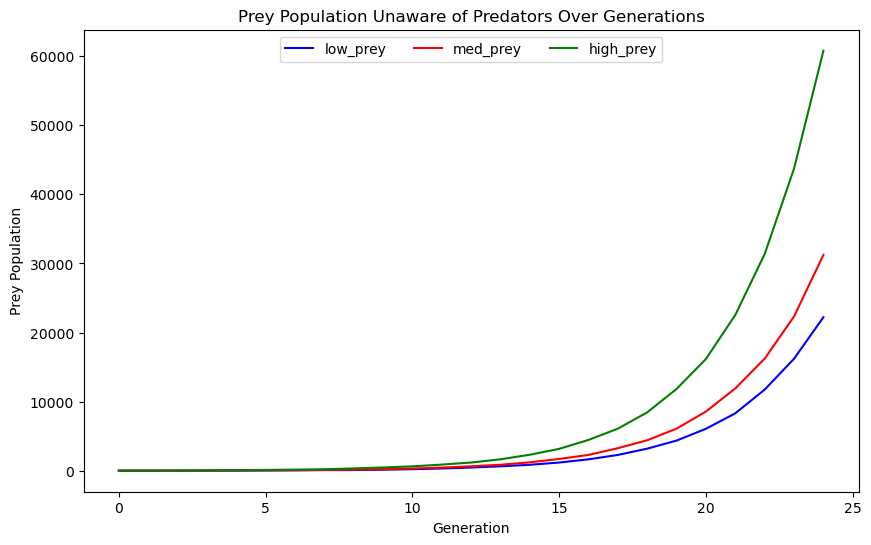

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(df['Generation'], df['PreyLow'], label='low_prey', color='blue')
plt.plot(df['Generation'], df['PreyMed'], label='med_prey', color='red')
plt.plot(df['Generation'], df['PreyHigh'], label='high_prey', color='green')
plt.legend(ncols=3, loc='upper center')
plt.title('Prey Population Unaware of Predators Over Generations')
plt.xlabel('Generation')
plt.ylabel('Prey Population')